### Cougar: Cubic Root Verifier Inner Product Argument under Discrete Logaritm Assumption

Using the provided raw data in `/RawData/*`, This notebook reproduces the Fig. 7 and Table 3 in the manuscript

In [1]:
# Load Data and Preprocessing

f = open("./RawData/exp_BP_single.txt")
BP_data = f.readlines()
BP_data = [float(d[:-1]) for d in BP_data]
f.close()

# LP
f = open("./RawData/exp_LP_single.txt")
LP_data = f.readlines()
LP_data = [float(d[:-1]) for d in LP_data]
f.close()

# Cougar
f = open("./RawData/exp_CP_single.txt")
CP_data = f.readlines()
CP_data = [float(d[:-1]) for d in CP_data]
f.close()

In [2]:
import matplotlib.pyplot as plt
import math

import numpy as np

# Least Square Solver
def least_sq(data, start = 10):
    n_data = len(data)
    X = np.ones([n_data, 2])
    X[:, 1] = np.arange(start, n_data + start)
    Y = np.array(data).reshape(n_data, 1)

    X_dag = np.linalg.pinv(X)
    return X_dag @ Y
    
# Plotting Tool
def plot_all(datablocks, names, start = 10):
    # Plotting Parameters
    cmaps = dict(); c_pool = ["r", "g", "b"]; markers = dict(); m_pool = ["o", "^", "s"];
    for i, name in enumerate(names):
        cmaps[name] = c_pool[i]
        markers[name] = m_pool[i]

    # Dividing the RawData into Prover Time / Verifier Time / Proof Size
    pts, vts, pss = [], [], []
    for datablock in datablocks:
        pt, vt, ps = datablock[::3], datablock[1::3], datablock[2::3]
        n_samples = len(pt)
        pts.append(pt)
        vts.append(vt)
        pss.append(ps)
    base = [i + start for i in range(n_samples)]

    # Plotting Parameters
    ft_ticks = 18
    ft_title = 20
    ft_label = 20
    ft_legend = 18
    figsize = (6,6)

    # Prover Time
    plt.figure(figsize = figsize)
    for pt, name in zip(pts, names):
        plt.plot(base, pt, cmaps[name]+'--'+markers[name], label = f"{name}", linewidth = 3, alpha = 1, markersize = 10)    
        
    plt.title("Prover Time (s)", fontsize = ft_title, weight = "bold")
    plt.yscale("log", base = 2)
    plt.xlabel(r"$\log_{2}N$", fontsize = ft_label)
    # plt.ylabel("Elapsed Time", fontsize = ft_label)
    plt.xticks(fontsize = ft_ticks)
    plt.yticks(fontsize = ft_ticks)    
    plt.grid("on")
    plt.legend(fontsize = ft_legend)    
    plt.show()

    # Verifier Time
    plt.figure(figsize = figsize)
    for vt, name in zip(vts, names):
        log2_vt = [math.log2(v) for v in vt]
        alpha, beta = least_sq(log2_vt)
        line = np.arange(base[0], base[-1] + 1) * beta + alpha
        mse = np.mean((line - log2_vt) ** 2)
        # Reporting the result of Least Square
        print(f"MSE in {name}: {mse:.3f}")
        print(f"alpha, beta: {beta[0]}, {alpha[0]}")
        
        plt.plot(base, vt, cmaps[name]+'--'+markers[name], label = f"{name}", linewidth = 3, alpha = 1, markersize = 10)    
        plt.plot(base, 2**line, cmaps[name], linewidth = 3, alpha = .7,)

    plt.title("Verifier Time (s)", fontsize = ft_title, weight = "bold")
    plt.yscale("log", base = 2)    
    plt.xlabel(r"$\log_{2}N$", fontsize = ft_label)
    plt.xticks(fontsize = ft_ticks)
    plt.yticks(fontsize = ft_ticks)
    plt.grid("on")
    plt.legend(fontsize = ft_legend)
    plt.show()

    # Proof Size
    plt.figure(figsize = figsize)
    for ps, name in zip(pss, names):
        plt.plot(base, ps, cmaps[name]+'--'+markers[name], label = name, linewidth = 3, markersize = 10)    

    plt.title("Proof Size (Byte)", fontsize = ft_title, weight = "bold")
    plt.yscale("log", base = 10)  
    plt.xlabel(r"$\log_{2}N$", fontsize = ft_label)
    plt.xticks(fontsize = ft_ticks)
    plt.yticks(fontsize = ft_ticks)
    plt.grid("on")
    plt.legend(fontsize = ft_legend)    
    plt.show()
    return None


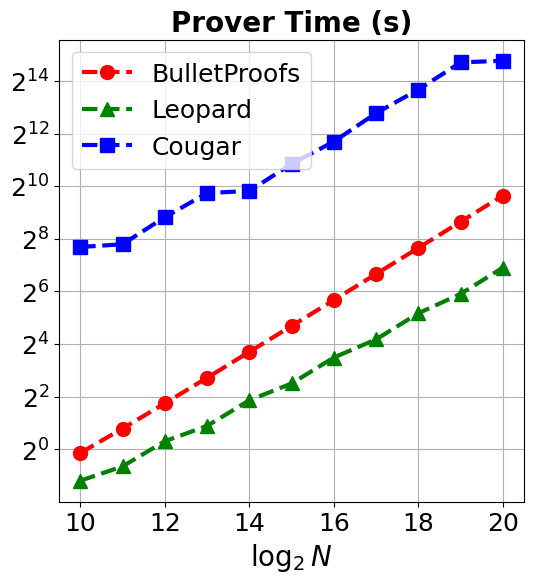

MSE in BulletProofs: 0.006
alpha, beta: 0.8869811378780257, -13.757812685730164
MSE in Leopard: 0.010
alpha, beta: 0.2820685759040161, -8.777151270772432
MSE in Cougar: 0.009
alpha, beta: 0.24291975768882906, -6.464457703612494


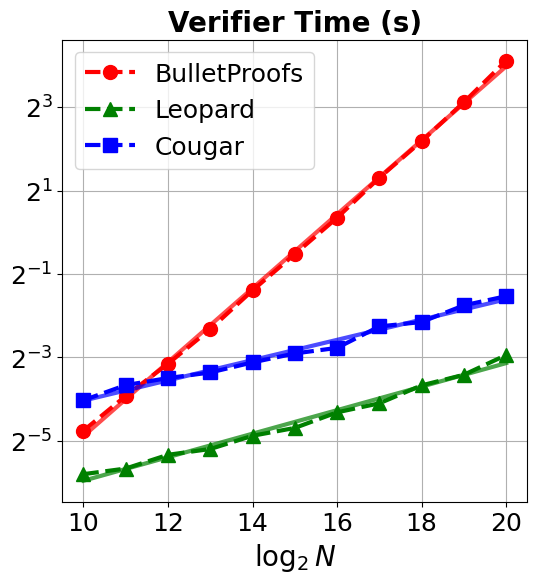

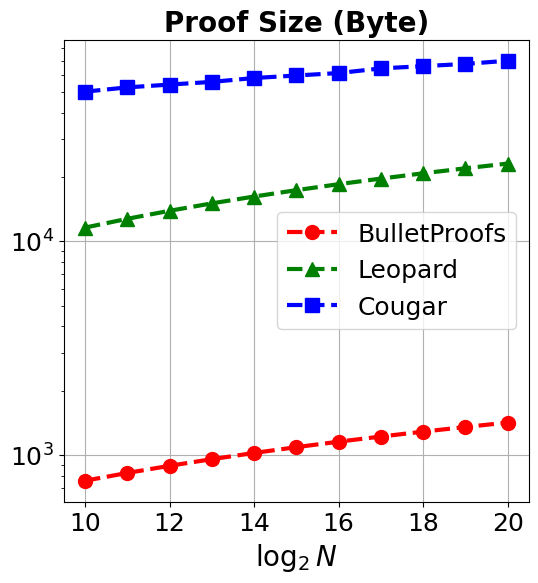

In [3]:
# This reproduces Figure 7.
plot_all(
    [BP_data, LP_data, CP_data],
    ["BulletProofs", "Leopard", "Cougar"]
)

In [4]:
# This reproduces Table 3.
cnt = 0
for i in range(len(CP_data) // 3):
    ret = []
    ret.append(BP_data[cnt])
    ret.append(LP_data[cnt])
    ret.append(CP_data[cnt])
    ret.append(BP_data[cnt+1])
    ret.append(LP_data[cnt+1])
    ret.append(CP_data[cnt+1])
    ret.append(int(BP_data[cnt+2]) / 1000)
    ret.append(int(LP_data[cnt+2]) / 1000)
    ret.append(int(CP_data[cnt+2]) / 1000)

    ret = [f"{dat:.2f}" for dat in ret]
    ret = ' & '.join(ret)
    cnt += 3
    print(" " + ret + " \\\\")

 0.91 & 0.44 & 206.50 & 0.04 & 0.02 & 0.06 & 0.76 & 11.58 & 50.14 \\
 1.73 & 0.64 & 221.81 & 0.07 & 0.02 & 0.08 & 0.82 & 12.74 & 52.51 \\
 3.37 & 1.24 & 452.56 & 0.11 & 0.02 & 0.09 & 0.89 & 13.89 & 54.11 \\
 6.59 & 1.86 & 854.75 & 0.20 & 0.03 & 0.10 & 0.95 & 15.04 & 55.71 \\
 13.03 & 3.64 & 902.41 & 0.38 & 0.03 & 0.12 & 1.02 & 16.19 & 58.08 \\
 25.83 & 5.68 & 1842.18 & 0.70 & 0.04 & 0.13 & 1.09 & 17.34 & 59.68 \\
 51.10 & 11.25 & 3315.41 & 1.27 & 0.05 & 0.15 & 1.15 & 18.50 & 61.28 \\
 101.54 & 18.14 & 7014.62 & 2.48 & 0.06 & 0.21 & 1.22 & 19.65 & 64.42 \\
 201.80 & 36.11 & 13051.82 & 4.55 & 0.08 & 0.23 & 1.28 & 20.80 & 66.02 \\
 401.63 & 60.12 & 26646.53 & 8.71 & 0.09 & 0.30 & 1.35 & 21.95 & 67.62 \\
 801.16 & 120.10 & 27866.03 & 17.34 & 0.13 & 0.35 & 1.42 & 23.10 & 69.98 \\
